# Accessing the project's API's

## Inowas

In [1]:
import os
import requests
import json
import pandas as pd
import datetime
import time

In [20]:
request = requests.get('https://sensors.inowas.com/list').json()
request_index = [ i for i in request if i['project'] == 'DEU1']
df = pd.DataFrame(request_index)
df

,id,location,name,parameters,project
0,b4b39661-7033-4c04-a51a-36cb36507fc8,,123,"[t_intern, ec_25, ec, h_level, v_batt, t, h]",DEU1
1,548843f7-f354-4f59-a2e3-d51a444d42e3,,124,"[ec_25, h, h_level, t, t_intern, v_batt, ec]",DEU1
2,4ff6932b-722d-42c2-b6e2-0124dceaf934,,125,"[v_batt, ec, ec_25, h, h_level, t, t_intern]",DEU1
3,99911176-6e05-4cc6-b01d-86b33010b2bd,,126,"[h, h_level, t, t_intern, v_batt, ec, ec_25]",DEU1
4,d79989b8-bde9-4744-bc39-1de03562284c,,127,"[ec, v_batt, t_intern, t, h_level, h, ec_25]",DEU1
5,92f5a88d-e079-47c3-a983-26db8c317a5e,,I-2,"[ph, h_level, ldo, h, v_batt, ec, t, ec_25, t_...",DEU1
6,a0b8f4e7-ac0c-4a50-aec5-e96704089732,,I-3,"[t, ec, ec_25, h, h_level, ldo, ph, t_intern, ...",DEU1
7,a02ac9ac-784e-4be3-81cb-30e89541310a,,I-5,"[v_batt, t_intern, t, ph, ldo, h_level, h, ec_...",DEU1
8,2c290fe2-9518-4ce4-8359-805b0e262c78,,I-6,"[h, ec_25, v_batt, t_intern, t, ph, ldo, h_lev...",DEU1


In [35]:
for i in df.iterrows():
    print(i[1]['id'], i[1]['name'])

b4b39661-7033-4c04-a51a-36cb36507fc8 123
548843f7-f354-4f59-a2e3-d51a444d42e3 124
4ff6932b-722d-42c2-b6e2-0124dceaf934 125
99911176-6e05-4cc6-b01d-86b33010b2bd 126
d79989b8-bde9-4744-bc39-1de03562284c 127
92f5a88d-e079-47c3-a983-26db8c317a5e I-2
a0b8f4e7-ac0c-4a50-aec5-e96704089732 I-3
a02ac9ac-784e-4be3-81cb-30e89541310a I-5
2c290fe2-9518-4ce4-8359-805b0e262c78 I-6


In [11]:
df_ = df.loc [df.project == 'DEU1']
parameters_list = []
for diver in df_.iterrows():
    parameters = diver[1].parameters
    for parameter in parameters:
        if parameter in parameters_list: continue
        parameters_list.append(parameter)
for i,j in enumerate(parameters_list):
    print(i,j)

0 t_intern
1 ec_25
2 ec
3 h_level
4 v_batt
5 t
6 h
7 ph
8 ldo


h_level and h are the same variables

In [214]:
URL = 'https://sensors.inowas.com/sensors/project/DEU1/sensor/I-6/parameters/h&ec'
request = requests.get(URL).json()

JSONDecodeError: [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>404 Not Found</title>
<h1>Not Found</h1>
<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>
: 0

In [205]:
df = pd.DataFrame(request)
df.head()

""


In [160]:
date_time = datetime.datetime(2021, 7, 26, 21, 20)

ts = time.mktime(date_time.timetuple())

date_time2 = datetime.datetime.fromtimestamp(ts) 

print(date_time, ts, date_time2)

2021-07-26 21:20:00 1627327200.0 2021-07-26 21:20:00


In [192]:
request

[]

In [174]:
edu

1664575200

In [ ]:
UR

'https://sensors.inowas.com/sensors/project/DEU1/sensor/I-6/parameter/ec?timeResolution=1D&dateFormat=iso&start=1609455600&end=edu&gt=-100.0'

<AxesSubplot: xlabel='date_time'>

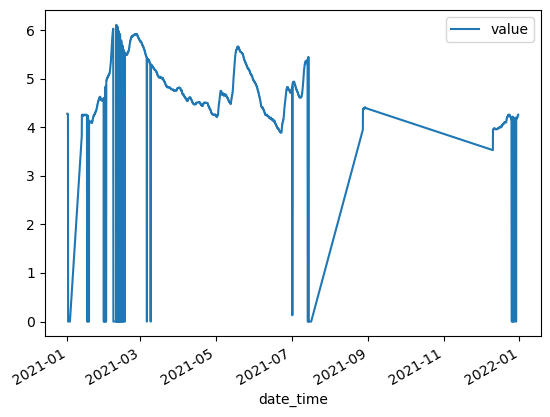

In [216]:
sd = datetime.datetime(2021, 1, 1)
ed = datetime.datetime(2021, 12, 31)
stu =  int(time.mktime(sd.timetuple()))
edu =  int(time.mktime(ed.timetuple()))

parameter, sensor ='h', 'I-6'

URL = f'https://sensors.inowas.com/sensors/project/DEU1/sensor/{sensor}/parameter/{parameter}?timeResolution=RAW&dateFormat=iso&start={stu}&end={edu}&gt=-100.0'


request = requests.get(URL).json()

df = pd.DataFrame(request)
df['date_time'] = pd.to_datetime(df.date_time)
df.plot(x = 'date_time', y = 'value')

### Is there a way?

1. Make a request for all of the sensors for a specific parameter? (Map)
2. Make a request for all of the parameters and a unique sensor? (TimeSeries context)

## Environmental company